In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# Subgroups Age Population

Here you will see Fig.2 - B (Boxplot of age distribution in subgroups) on the research paper. <br>
Before you start this, you should complete **analysis_notebook folder - 05_morbidity_composition.ipynb** <br>
Because we will going to use the subgroups that you found in there!
By this point, you should have 7 CSV files saved in processed_data folder.

In [3]:
# match your subgroups again
sub1 = pd.read_csv("../processed_data/subgroup_4.csv").assign(subgroup = 1)
sub2 = pd.read_csv("../processed_data/subgroup_3.csv").assign(subgroup = 2)
sub3 = pd.read_csv("../processed_data/subgroup_7.csv").assign(subgroup = 3)
sub4 = pd.read_csv("../processed_data/subgroup_6.csv").assign(subgroup = 4)
sub5 = pd.read_csv("../processed_data/subgroup_1.csv").assign(subgroup = 5)
sub6 = pd.read_csv("../processed_data/subgroup_2.csv").assign(subgroup = 6)

In [4]:
sub_all = pd.concat([sub1, sub2, sub3, sub4, sub5, sub6], axis=0, ignore_index=False)
sub_all

,subject_id,hadm_id,rounded_age,admission_type_encoded,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,hypertension,...,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression,age,admission_type,subgroup
0,48539,100035,37,1,1,1,0,0,0,1,...,1,0,0,0,0,0,1,37,1,1
1,82091,100099,71,1,1,1,0,0,0,1,...,1,0,0,0,0,0,1,71,1,1
2,19644,100124,79,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,79,1,1
3,31716,100206,84,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,84,1,1
4,54736,100210,53,1,1,1,1,1,0,0,...,1,0,0,0,1,0,0,53,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9107,28616,199981,90,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,90,1,6
9108,55617,199984,90,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,90,1,6
9109,94911,199992,86,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,86,1,6
9110,20785,199993,61,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,61,1,6


<AxesSubplot:xlabel='subgroup', ylabel='age'>

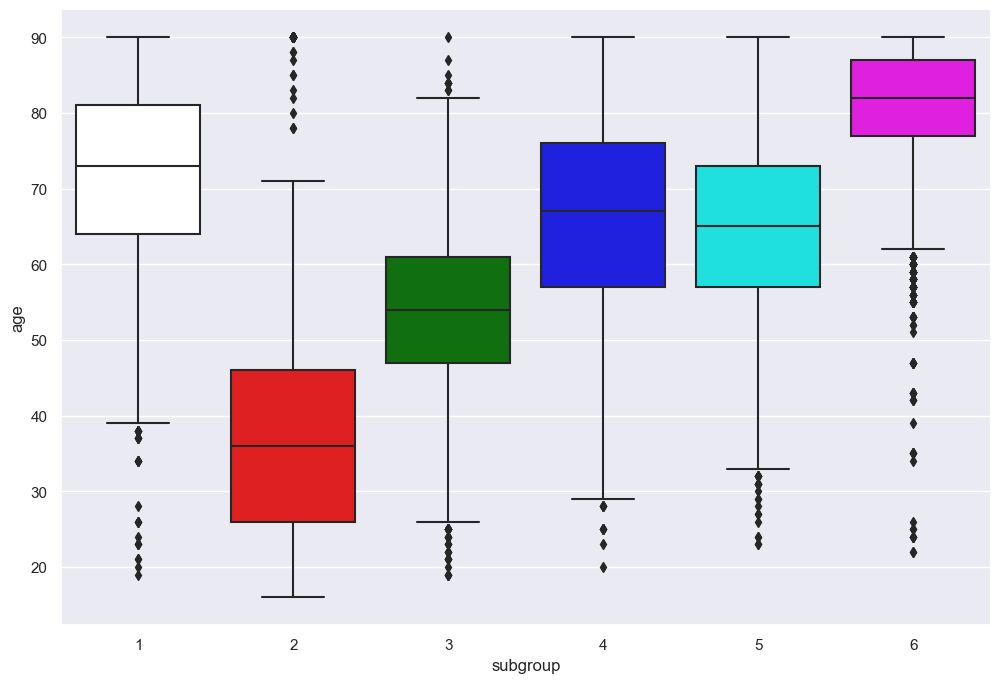

In [5]:
sns.set(rc={"figure.figsize":(12, 8)})
sns.boxplot(x = sub_all['subgroup'], 
            y = sub_all['age'],
            palette = ['white', 'red', 'green', 'blue', 'cyan', 'magenta'])

### Mean ages for each subgroup

In [6]:
print(sub1['age'].mean())
print(sub2['age'].mean())
print(sub3['age'].mean())
print(sub4['age'].mean())
print(sub5['age'].mean())
print(sub6['age'].mean())

71.84097859327217
36.61772513783949
54.32468206592266
65.88275015346838
64.8019943019943
81.09339332748024


### Median ages for each subgroup

In [7]:
print(sub1['age'].median())
print(sub2['age'].median())
print(sub3['age'].median())
print(sub4['age'].median())
print(sub5['age'].median())
print(sub6['age'].median())

73.0
36.0
54.0
67.0
65.0
82.0


# Subgroup Multimorbidity Count
Here you will see Fig.2 - A (Balloonplot summary of morbidity count for each subgroup) on the research paper. <br>
This is different from the research paper due to the following reasons:
1. We use total count morbidities, instead of percentage of numbers of morbidity.
2. We use sns.scatterplot() using Python, instead of using ggballoonplot() using R.

In [8]:
sub_all_comor = sub_all[
        ['congestive_heart_failure', 'cardiac_arrhythmias', 
         'valvular_disease', 'pulmonary_circulation', 
         'peripheral_vascular', 'hypertension',
         'paralysis', 'other_neurological',
         'chronic_pulmonary', 'diabetes_uncomplicated',
         'diabetes_complicated', 'hypothyroidism',
         'renal_failure', 'liver_disease',
         'peptic_ulcer', 'aids',
         'lymphoma', 'metastatic_cancer',
         'solid_tumor', 'rheumatoid_arthritis',
         'coagulopathy', 'obesity',
         'weight_loss', 'fluid_electrolyte',
         'blood_loss_anemia', 'deficiency_anemias',
         'alcohol_abuse', 'drug_abuse',
         'psychoses', 'depression']].assign(multimorbidity_count = sub_all.iloc[:, 4:30].sum(axis=1))

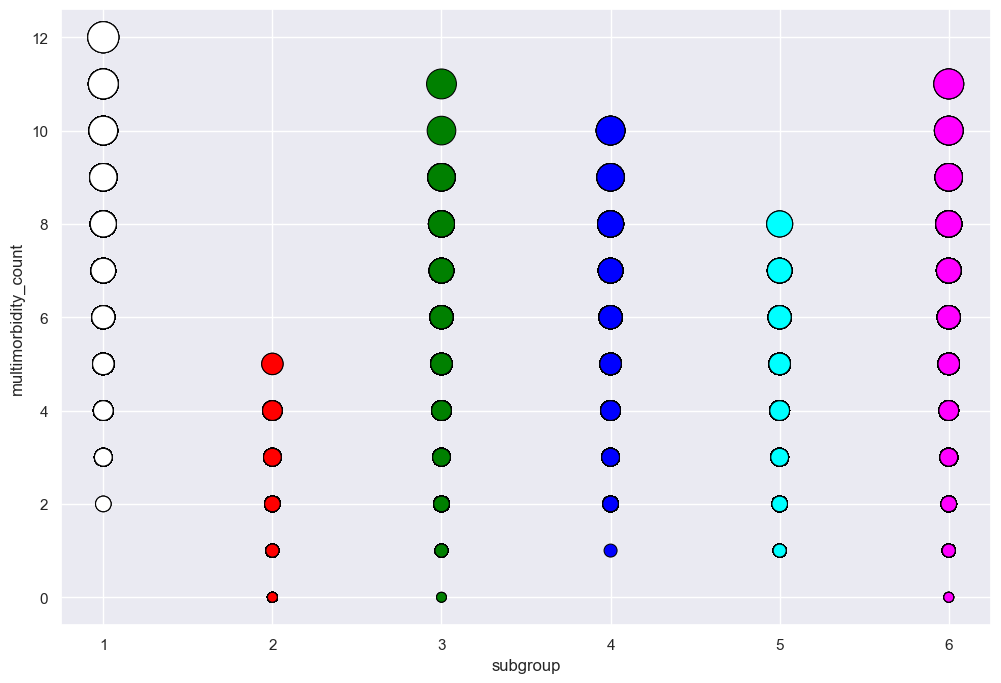

In [10]:
sns.set(rc={"figure.figsize":(12, 8)})
sns.scatterplot(x = sub_all['subgroup'], 
            y = sub_all_comor['multimorbidity_count'],
            size = sub_all_comor['multimorbidity_count'],
            sizes =(50, 500),
            hue = sub_all['subgroup'], 
            palette=['white', 'red', 'green', 'blue', 'cyan', 'magenta'],
            edgecolor = 'black').legend_.remove()

### Does your result seem reasonable?
Compare your result with our result on Team 2 Github Repository - final_result.pdf